In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [8]:
df=pd.read_csv('/content/tvmarketing.csv')
df.head()
df.info()
df.shape
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   TV      200 non-null    float64
 1   Sales   200 non-null    float64
dtypes: float64(2)
memory usage: 3.2 KB


,TV,Sales
count,200.000000,200.000000
mean,147.042500,14.022500
std,85.854236,5.217457
min,0.700000,1.600000
25%,74.375000,10.375000
50%,149.750000,12.900000
75%,218.825000,17.400000
max,296.400000,27.000000


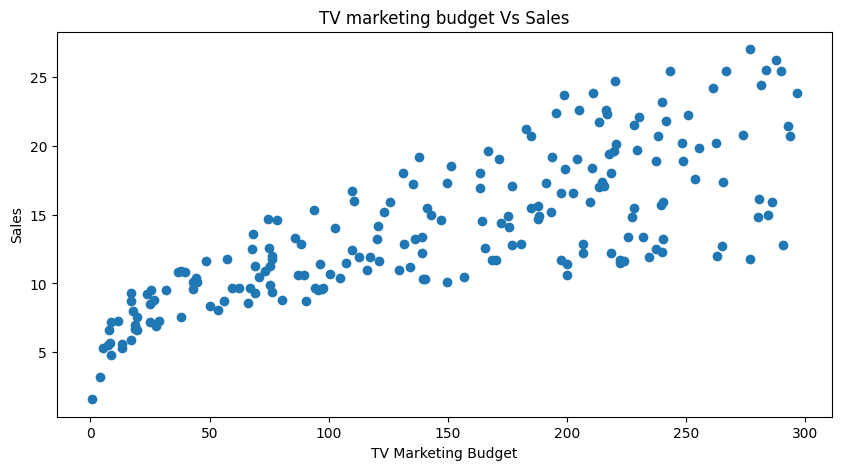

In [9]:
plt.figure(figsize=(10,5))
plt.scatter(df['TV'], df['Sales'])
plt.title("TV marketing budget Vs Sales")
plt.xlabel('TV Marketing Budget')
plt.ylabel('Sales')
plt.show()

In [10]:
X=df['TV']
y=df['Sales']
print(X.shape, y.shape)

(200,) (200,)


In [11]:
X_train,X_test, y_train,y_test = train_test_split(X,y,test_size=.3,random_state=42)
print(X_train.shape,X_test.shape, y_train.shape,y_test.shape)

X_train = X_train.values.reshape(-1,1)
X_test = X_test.values.reshape(-1,1)
y_train = y_train.values.reshape(-1,1)
y_test = y_test.values.reshape(-1,1)

lr = LinearRegression()
lr.fit(X_train,y_train)

print(lr.intercept_)
print(lr.coef_)

slope = lr.coef_[0]
intercept = lr.intercept_[0]

(140,) (60,) (140,) (60,)
[7.23945983]
[[0.0464078]]


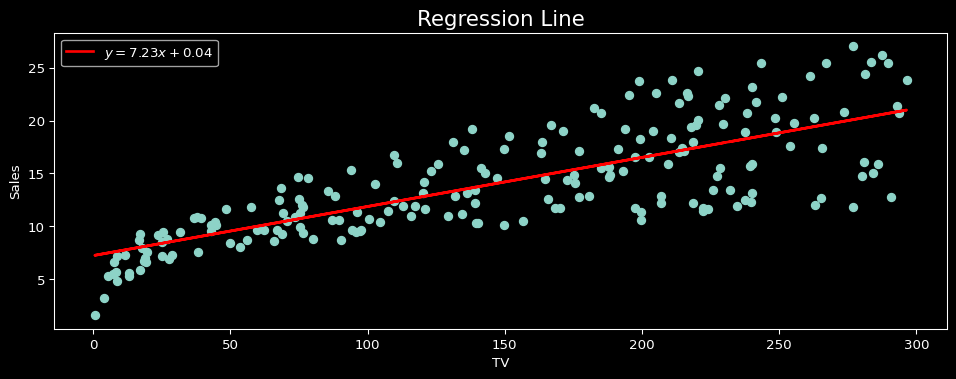

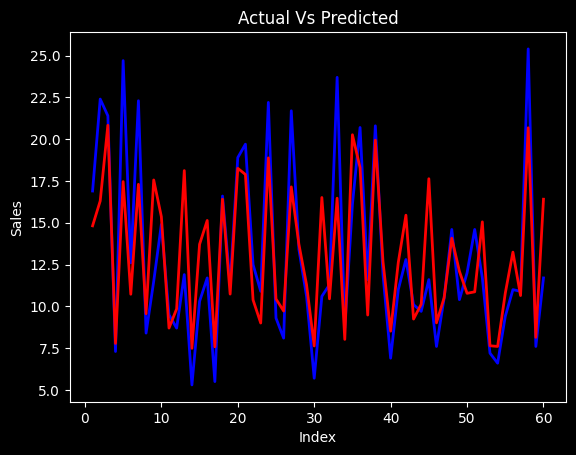

array([[53.64726196]])

Mean_Squared_Error : 8.970991242413614
r_square_value : 0.6714477229302764


In [12]:
plt.style.use('dark_background')
plt.figure(figsize = (12, 4), dpi = 96)
plt.title("Regression Line", fontsize = 16)
plt.scatter(df['TV'], df['Sales'])
plt.plot(df['TV'], slope * df['TV'] + intercept, color = 'r', linewidth = 2, label = '$y = 7.23x + 0.04$')
plt.xlabel("TV")
plt.ylabel("Sales")
plt.legend()
plt.show()

y_pred = lr.predict(X_test)
y_pred[:5]

x_axis = [i for i in range(1,61)]
plt.plot(x_axis,y_test, color="blue", linewidth=2, linestyle="-")
plt.plot(x_axis,y_pred, color="red",  linewidth=2, linestyle="-")
plt.title('Actual Vs Predicted')
plt.xlabel('Index')
plt.ylabel('Sales')
plt.show()

mse = mean_squared_error(y_test, y_pred)
r_squared = r2_score(y_test, y_pred)
print('Mean_Squared_Error :' ,mse)
print('r_square_value :',r_squared)

pred = lr.predict([[1000]])
pred